### Aim: To develop a fuzzy system for predicting tips to be given for a hotel service based on fuzzy variables service and food quality

In [ ]:
!pip install scikit-fuzzy


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [ ]:
quality = ctrl.Antecedent(np.arange(0,11,1),'quality')
quality

Antecedent: quality

In [ ]:
service = ctrl.Antecedent(np.arange(0,11,1),'service')

In [ ]:
tip = ctrl.Consequent(np.arange(0,26,1),'tip')

In [ ]:
quality.automf(3)   #mf = membership_function 3 = poor,average,good

In [ ]:
service.automf(3)

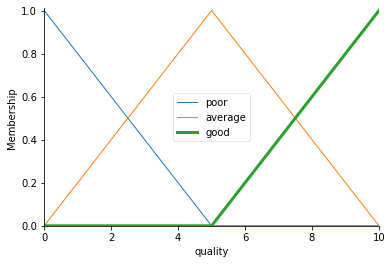

In [ ]:
quality['good'].view()

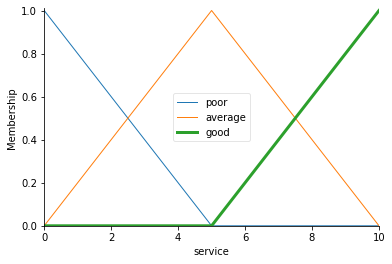

In [ ]:
service['good'].view()

In [ ]:
tip['low'] = fuzz.trimf(tip.universe,[0,0,13])        #trimf = triangular membership function
tip['medium'] = fuzz.trimf(tip.universe,[0,13,25])
tip['high'] = fuzz.trimf(tip.universe,[13,25,25])

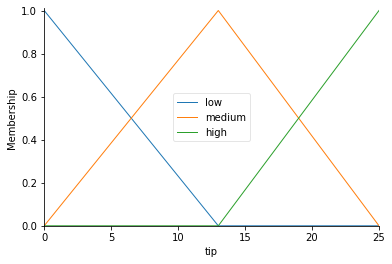

In [ ]:
tip.view()

In [ ]:
rule1 = ctrl.Rule(quality['poor']|service['poor'],tip['low'])
rule2 = ctrl.Rule(quality['average']|service['average'],tip['medium'])
rule3 = ctrl.Rule(quality['good']|service['good'],tip['high'])

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
tipping_system = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
tipping_system.input['quality'] = 6.5   #6.5 = crisp value
tipping_system.input['service'] = 9.8
tipping_system.compute()

In [ ]:
tipping_system.output['tip']

14.79822137450634